# **AutoEncoder 활용 이상탐지**  
**┗ 심장 질병 이상 환자 예측**
---
> **목차(Context)**

* 문제상황 및 데이터 살펴보기
* 문제해결 프로세스 정의
* 🥉Session 1 - 「Data 전처리 및 EDA」
* 🥈Session 2 - 「데이터 범주화 및 탐색」
* 🥇Session 3 - 「AutoEncoder 활용 이상진단」

In [51]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

# # ▶ 경로 설정 (※ Colab을 활성화시켰다면 보통 Colab Notebooks 폴더가 자동 생성)
# import os
# os.chdir("/content/drive/MyDrive/Share/Personal/Detection/Autoencoder")
# os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **문제상황 및 데이터 살펴보기**
---
> **시나리오** 🏥💗

```
심장 질병은 발병하게 되면 심각한 건강상 위험을 초래하므로 사전에 이상징후를 발견하는 것이 매우 중요한 일이다.
A병원은 아직 개원 초기라 심장질병 환자들의 진료 기록 데이터(기본 검사)를 보유하고 있지 못하는 상황이다.  
따라서 정상 데이터를 학습하여 이상징후가 있는 환자를 사전에 발견하고 진료하는 체계를 구축하고자 한다.

```  

> **데이터 살펴보기**

* 환자 개인 프로필 데이터
* 데이터 명세 ⬇

|Column|Description|
|:---|:---|
|HeartDiseaseorAttack|심장질환여부|
|HighBP|고혈압|
|HighChol|혈중콜레스트롤|
|CholCheck|최근5년이내 콜레스트롤 검사여부|
|BMI|체질량지수|
|Smoker|흡연여부|
|Stroke|뇌졸중여부|
|Diabetes|당뇨병여부|
|PhysActivity|30일이내운동여부|
|Fruits|하루1회 과일섭취 여부|
|Veggies|하루1회 채소섭취 여부|
|HvyAlcoholConsump|과음 여부|
|MentHlth|최근 30일 스트레스 일수|
|PhysHlth|최근 30일 신체건강 나쁨 일수|
|DiffWalk|계단/걸음 문제|건강보험여부|
|AnyHealthcare|기타 건강관리 여부|
|NoDocbcCost|12개월내 병원방문이 필요하나 방문N(비용문제)|
|GenHlth|일반적 건강상태|
|Sex|성별|
|Age|연령|
|Education|교욱수준|
|Income|소득수준|


In [52]:
# ▶ pd.setoption
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

# ▶ Data read
df = pd.read_csv("/content/drive/MyDrive/Share/Personal/Detection/Autoencoder/heart_disease.csv")
df.head(10)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0



## **문제해결 프로세스 정의**
---
> **문제정의**

```
▶ 심장 질병 이상징후 발견 시스템 부재
```  

> **기대효과**

```
▶ 심장 질병 이상징후 환자 사전 진단 및 치료
```

> **해결방안**

```
▶ 정상 데이터를 Autoencodr로 학습하여 이상 환자 예측
▶ Session 1 🥉
 - Data 전처리 및 EDA
▶ Session 2 🥈
 - 데이터 범주화 및 탐색
▶ Session 3 🥇
 - AutoEncoder 활용 이상진단
```

> **성과측정**  

```
▶ 이상징후 환자 정밀 검사 후 심장 질병 유무 확인
```

> **현업적용**  

```
▶ 환자 기본 검사 후 이상징후 탐지 환자의 경우 정밀진단 진행
```

> **주요 코드 미리 살펴보기**  

```
▶ Session 1 → df.duplicated().value_counts(), df.drop_duplicates(inplace=True)
▶ Session 2 → sns.catplot
▶ Session 3 → print(f'X shape : {X.shape}'), tqdm, lr_scheduler.StepLR(optimizer, 10, gamma=0.2)
```

## **🥉Session 1**  
**┗ Data 전처리 및 EDA**  
---

### · Data 전처리  
---
* 수집된 데이터의 기본 정보들을 확인  

  (1) Data shape(형태) 확인

  (2) Data type 확인

  (3) Null값 확인 (※ 빈 값의 Data)

  (4) Outlier 확인 (※ 정상적인 범주를 벗어난 Data)  

In [53]:
# ▶ Data 형태 확인
# ▶ 253,680 row, 22 col로 구성됨
print('df', df.shape)

df (253680, 22)


In [54]:
# ▶ Data type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [55]:
# ▶ Null 값 확인
print(df.isnull().sum())

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [56]:
# ▶ Outlier 확인
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [57]:
# ▶ 중복 데이터 여부 확인
df.duplicated().value_counts()

False    229781
True      23899
dtype: int64

In [58]:
# ▶ 중복 데이터 제거, default = first
df.drop_duplicates(inplace=True)
df.shape

(229781, 22)

In [59]:
df.duplicated().value_counts()

False    229781
dtype: int64

### · Target 변수 분포 확인
---
* 예측 하고자 하는 Target 변수(target) 분포 확인

In [60]:
pd.DataFrame({"count":df['HeartDiseaseorAttack'].value_counts(),"ratio(%)":df['HeartDiseaseorAttack'].value_counts(normalize=True)*100})

,count,ratio(%)
0.0,206064,89.678433
1.0,23717,10.321567


### · 데이터 범주화(Categorizing)
---
* 데이터를 성격과 특성에 맞춰 범주화
* 범주화를 하는 이유?
 * 새로운 인사이트 발견
 * 모델링 후 변수 해석력 상승
 * 범주화 기반 가설 수립

In [61]:
# ▶ (1) 개인 프로필
Demo = ['Sex', 'Age', 'Education', 'Income', 'AnyHealthcare', 'NoDocbcCost']
df[Demo].head()

,Sex,Age,Education,Income,AnyHealthcare,NoDocbcCost
0,0.0,9.0,4.0,3.0,1.0,0.0
1,0.0,7.0,6.0,1.0,0.0,1.0
2,0.0,9.0,4.0,8.0,1.0,1.0
3,0.0,11.0,3.0,6.0,1.0,0.0
4,0.0,11.0,5.0,4.0,1.0,0.0


In [62]:
# ▶ (2) 밀접(기저) 질환 병력 유무
medical_history = ['HighBP', 'Stroke', 'Diabetes', 'HighChol', 'CholCheck']
df[medical_history].head()

,HighBP,Stroke,Diabetes,HighChol,CholCheck
0,1.0,0.0,0.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,1.0


In [63]:
# ▶ (3) 일상 생활/식습관 패턴
life_style = ['BMI', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'MentHlth', 'PhysHlth', 'DiffWalk', 'GenHlth']
df[life_style].head()

,BMI,Smoker,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,DiffWalk,GenHlth
0,40.0,1.0,0.0,0.0,1.0,0.0,18.0,15.0,1.0,5.0
1,25.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,28.0,0.0,0.0,1.0,0.0,0.0,30.0,30.0,1.0,5.0
3,27.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0
4,24.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,2.0


## **🥈Session 2**  
**┗ 가설 수립 및 검증**  
---
* 문제해결 프로세스(Problem Solving Process)에서 가장 핵심적인 부분
* 가설은 문제해결을 위한 '핵심 아이디어'
* 현재 우리가 보유하고 있는 데이터로 문제를 해결할 수 있는지 사전 검증하는 작업

### · ① 개인 프로필
---

In [64]:
# ▶ (1) 개인 프로필(Demo) > Sex, Age, Education, Income은 타겟 변수와의 관계가 높음
Demo

['Sex', 'Age', 'Education', 'Income', 'AnyHealthcare', 'NoDocbcCost']

[TB]-------------------------
           count     sum  ratio
Education                      
1.0          174    29.0   16.7
2.0         4040   778.0   19.3
3.0         9467  1617.0   17.1
4.0        61158  7452.0   12.2
5.0        66499  6890.0   10.4
6.0        88443  6951.0    7.9
-----------------------------


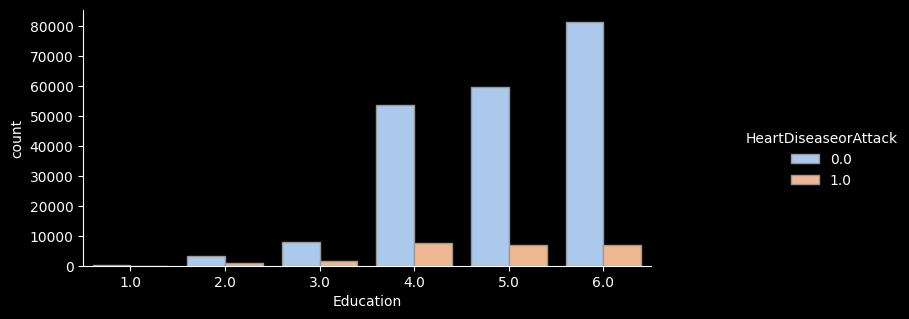

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

# ▶ Sex(성별)
val = 'Education'

sns.catplot(x=val, hue="HeartDiseaseorAttack", kind="count", palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)


df_gp = df.groupby(val)['HeartDiseaseorAttack'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
print('[TB]-------------------------')
print(df_gp)
print('-----------------------------')

### · ② 밀접 질환 병력 유무
---

In [66]:
# ▶ (2) 밀접 질환 병력 유무 > 모두 밀접한 관련이 있다.
medical_history

['HighBP', 'Stroke', 'Diabetes', 'HighChol', 'CholCheck']

[TB]---------------------------------------
            count      sum  ratio  ratio_2
CholCheck                                 
0.0          9298    271.0    2.9      4.0
1.0        220483  23446.0   10.6     96.0
-------------------------------------------


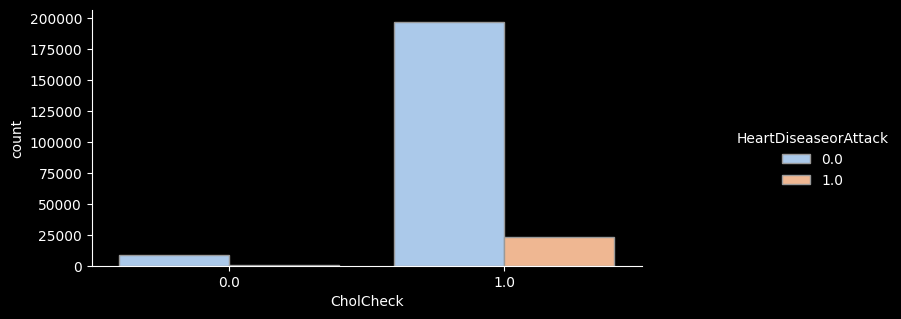

In [67]:
# ▶ Stroke
val = 'CholCheck'

sns.catplot(x=val, hue="HeartDiseaseorAttack", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)


df_gp = df.groupby(val)['HeartDiseaseorAttack'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp['ratio_2'] = round((df_gp['count'] / len(df))*100,1)
print('[TB]---------------------------------------')
print(df_gp)
print('-------------------------------------------')

### · ③ 일상 생활/식습관 패턴
---

In [68]:
# ▶ (3) 일상 생활/식습관 패턴
print(life_style)

['BMI', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'MentHlth', 'PhysHlth', 'DiffWalk', 'GenHlth']


[TB]---------------------------------------
         count     sum  ratio  ratio_2
GenHlth                               
1.0      34907  1009.0    2.9     15.2
2.0      77536  4037.0    5.2     33.7
3.0      73714  7841.0   10.6     32.1
4.0      31546  6724.0   21.3     13.7
5.0      12078  4106.0   34.0      5.3
-------------------------------------------


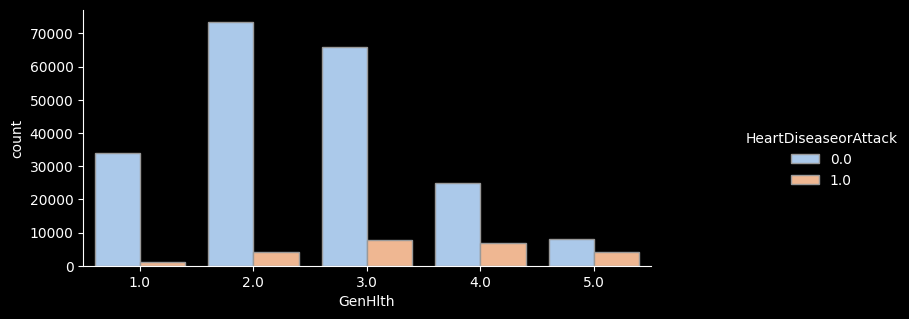

In [69]:
# ▶ DiffWalk
val = 'GenHlth'

sns.catplot(x=val, hue="HeartDiseaseorAttack", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)


df_gp = df.groupby(val)['HeartDiseaseorAttack'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp['ratio_2'] = round((df_gp['count'] / len(df))*100,1)
print('[TB]---------------------------------------')
print(df_gp)
print('-------------------------------------------')

## **🥇Session 3**  
**┗ Autoencoder 활용 이상진단**  
---

### · 모델링을 위한 데이터 준비
---
* 모델링을 수행하기 위해 Feature와 예측하고자하는 값인 Y로 데이터를 나눔
* 학습과 예측을 위한 Train / Test set 분할

In [70]:
# ▶ Test 데이터는 추후 이상진단 성능을 확인하기 위함 (※ Autoencoder 학습시에는 y data가 필요 없음)
from sklearn.model_selection import train_test_split

X = df.drop(columns='HeartDiseaseorAttack')
y = pd.DataFrame(df['HeartDiseaseorAttack'])

print(f'X shape : {X.shape}')
print(f'y shape : {y.shape}')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify= y, random_state=42)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X shape : (229781, 21)
y shape : (229781, 1)
X_train shape: (183824, 21)
X_test shape: (45957, 21)
y_train shape: (183824, 1)
y_test shape: (45957, 1)


In [71]:
# ▶ 정상 데이터만으로 학습하기 위해 정상 데이터 추출(1)
normal = pd.concat([X_train, y_train], axis=1)
normal['HeartDiseaseorAttack'].value_counts()

0.0    164850
1.0     18974
Name: HeartDiseaseorAttack, dtype: int64

In [72]:
# ▶ 정상 데이터만으로 학습하기 위해 정상 데이터 추출(2)
normal = normal[normal['HeartDiseaseorAttack'] == 0.0]
X_train = normal.drop(columns='HeartDiseaseorAttack')
y_train = pd.DataFrame(normal['HeartDiseaseorAttack'])

In [73]:
# ▶ MinMaxScaler vs RobustScaler
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler

scaler = preprocessing.MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

### · Tensor 변환
---
* 데이터 셋을 Pytorch Tensor 데이터 셋으로 변환
* Tensor : 다차원의 배열을 통칭

In [74]:
# ▶ Pytorch libraries import
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from tqdm import tqdm

np.random.seed(0)
torch.manual_seed(0)

In [75]:
# ▶ Tensor 변환 Class 선언
class Heart(Dataset):
    def __init__(self, X, y):
        self.n_samples = X.shape[0]
        # ▶ convert DataFrame to numpy array
        X = X.to_numpy()
        y = y.to_numpy()
        # ▶ convert numpy to tensor
        self.x_data = torch.from_numpy(X.astype(np.float32))
        self.y_data = torch.from_numpy(y.astype(np.float32))

    # ▶ support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    # ▶ we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples

In [76]:
# ▶ Class 활용, Tensor 변환 수행
train_data = Heart(X_train, y_train)
test_data = Heart(X_test, y_test)

In [77]:
# ▶ Tensor 변환 결과 확인
x_sample, y_sample = train_data[0]
print(f'elements of x_sample : \n{x_sample[:10]} \nand y_sample : \n{y_sample}')
print(f'x_sample shape : {x_sample.shape} and y_sample shape : {y_sample.shape}')

elements of x_sample : 
tensor([1.0000, 0.0000, 1.0000, 0.1744, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000]) 
and y_sample : 
tensor([0.])
x_sample shape : torch.Size([21]) and y_sample shape : torch.Size([1])


### · Dataset 및 DataLoader 생성
---
* DL을 위한 PyTorch Dataset 및 DataLoader 생성

In [78]:
# ▶ DataLoader 생성
batch_size=128

train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size = batch_size, shuffle = False)

# ▶ Test 시에는 데이터 하나의 Instance별 loss를 계산하기 위해 batch_size를 1로  설정
test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size = 1, shuffle = False)

print(f'length of train data is : {len(train_data)} and length of train loader is : {len(train_loader)}')
print(f'length of test data is : {len(test_data)} and length of test loader is : {len(test_loader)}')

length of train data is : 164850 and length of train loader is : 1288
length of test data is : 45957 and length of test loader is : 45957


### · NN(Neural Network, 신경망) 설계
---
* 딥러닝 모델 학습을 위한 신경망 설계
* MLP(Multi Layer Perceptron)-Autoencoder 구성

In [79]:
# ▶ Layer(21 -> 5 -> 21), Autoencoder는 x 데이터를 그대로 복원하는 것이기 때문에 Input size와 Output size가 동일
class Autoencoder(nn.Module):
    def __init__(self, input_size):
        super(Autoencoder, self).__init__()
        # ▶ Create linear encoder with Linear layer followed by Relu activation function
        self.encoder = nn.Sequential(
            torch.nn.Linear(input_size, 5),
            torch.nn.ReLU(),
        )

        # ▶ Create linear decoder with Linear layer followed by Relu activation function
        self.decoder = nn.Sequential(
            torch.nn.Linear(5, input_size),
            torch.nn.ReLU()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

In [80]:
# ▶ define a function for training a model
def train_ae(model1, train_loader):
  train_epoch_loss = 0
  model1.train() # ▶ train the model

  # ▶ 진행률 프로세스 바 설정
  loop = tqdm(enumerate(train_loader), total = total_step, leave = False)

  for i, batch in loop:
    optimizer.zero_grad()
    x, y = batch # ▶ retrieve x and y
    x = x.to(device)
    _, x_pred = model1(x)
    loss_train = criterion(x_pred, x)
    loss_train.backward()
    optimizer.step()

    train_epoch_loss += loss_train.item()

    # ▶ 진행률 프로세스 바 설정
    loop.set_description(f'Epoch : [{epoch}/{NUM_EPOCH}]')
    loop.set_postfix(loss = loss_train.item())

  train_loss.append(train_epoch_loss/len(train_loader))

  # ▶ if you want to monitor your model in tensorboard
  # ▶ writer.add_scalar('training loss',train_epoch_loss/len(train_loader) , epoch)
  return train_loss

In [81]:
# ▶ Input size, epoch, learning rate 설정
INPUT_SIZE = X.shape[1]
NUM_EPOCH = 5
LR = 0.01

In [82]:
# ▶ device 설정 (※ defalult CPU)
# (1) Model CPU 저장, GPU 불러오기
# (2) Model GPU 저장, GPU 불러오기
# (3) Model GPU 저장, CPU 불러오기
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [83]:
# ▶ create model
model = Autoencoder(INPUT_SIZE)

# ▶ create loss and optimizer
criterion = nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr= LR)

# ▶ 학습과정에서 learning rate를 조정하는 learning rate scheduler를 사용
# ▶ 처음엔 큰 learning rate(보폭)으로 빠르게 optimize를 하고 최적값에 가까워질수록 learning rate(보폭)를 줄여 미세조정을 하는 것
# └ optimizer: 이전에 정의한 optimizer 변수명을 넣어준다.
# └ step_size: 몇 epoch마다 lr을 감소시킬지가 step_size를 의미한다.
# └ gamma: gamma 비율로 lr을 감소시킨다.
scheduler = lr_scheduler.StepLR(optimizer, 10, gamma=0.2)

# ▶ 진행률 프로세스 바 설정
total_step = len(train_loader)

### · 모델 학습 및 평가
---
* 딥러닝 모델 학습 및 평가

In [84]:
train_loss = []

for epoch in range(NUM_EPOCH):
  train_loss = train_ae(model, train_loader)

  scheduler.step()

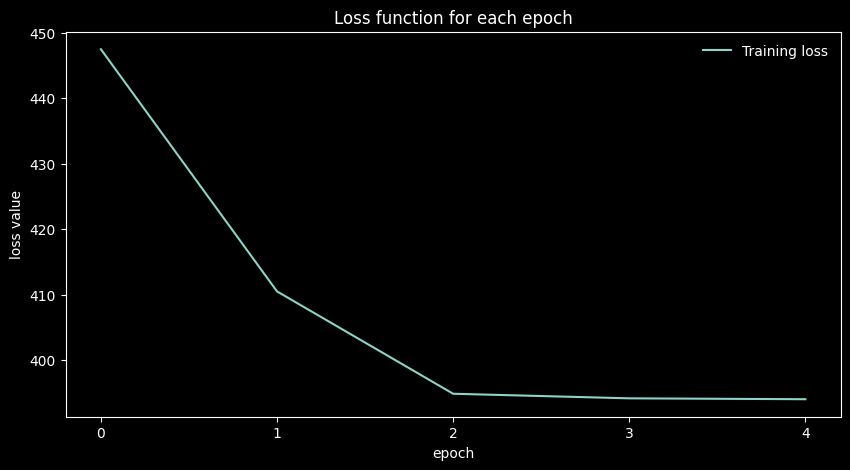

In [85]:
def plot_loss(loss):
  plt.figure(figsize=(10,5))
  plt.plot(loss, label="Training loss")
  plt.legend(frameon=False)
  plt.xticks([i for i in range(0, NUM_EPOCH)])
  plt.xlabel("epoch")
  plt.ylabel("loss value")
  plt.title("Loss function for each epoch")
  plt.show()

plot_loss(train_loss)

In [86]:
# test_loss = []
test_loss_ins = []

model.eval()
with torch.no_grad():
  test_epoch_loss = 0

# ▶ loader가 1 씩 들어가는 상황, 평균 낼 필요없이 모든 loss에 대해서 append 시키면 됨
for batch in test_loader:
  x, y = batch
  _, x_pred_test = model(x)
  loss_test = criterion(x_pred_test, x)
  test_loss_ins.append(loss_test.item())

In [87]:
test_set = pd.concat([y_test.reset_index(drop=True),pd.DataFrame(test_loss_ins, columns=['mse'])], axis=1)
test_set

,HeartDiseaseorAttack,mse
0,0.0,3.795568
1,0.0,1.613488
2,0.0,3.426044
3,0.0,3.058812
4,0.0,2.240015
...,...,...
45952,1.0,4.255475
45953,0.0,4.623581
45954,0.0,2.150009
45955,0.0,2.022338


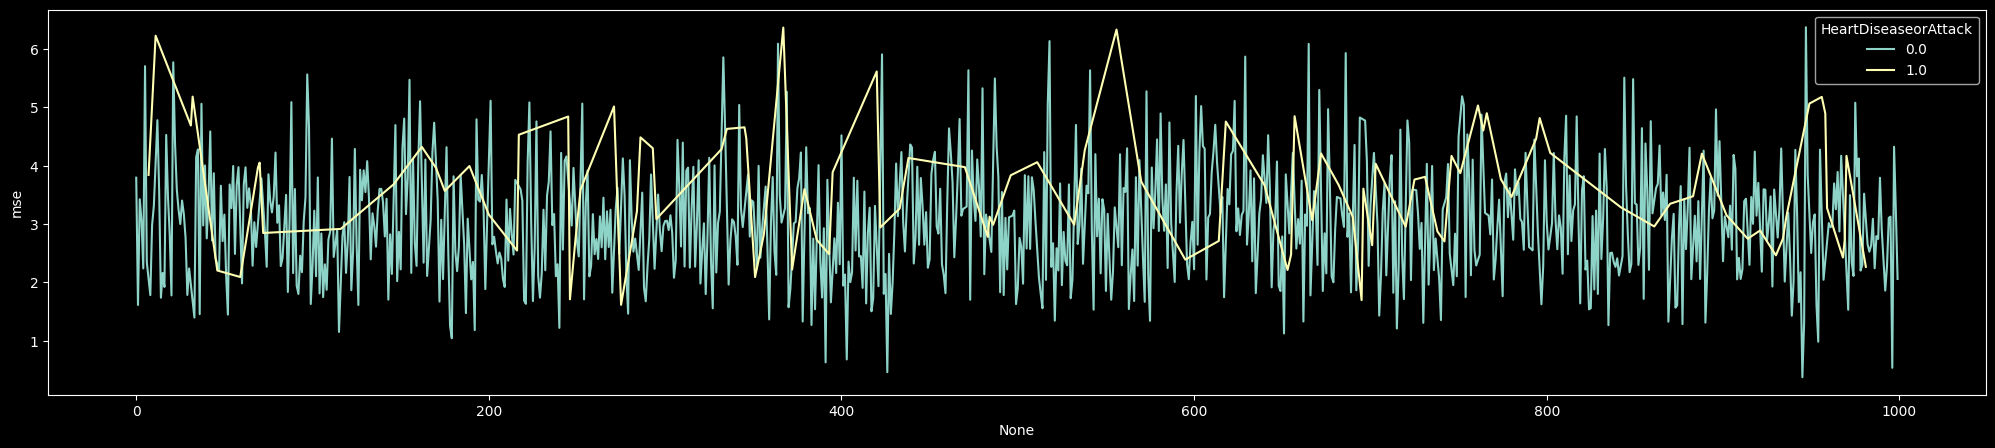

In [88]:
# ▶ train loss 출력
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['dark_background'])

df_plot = test_set.iloc[0:1000,:]
fig = plt.figure(figsize=(25,5))
sns.lineplot(x=df_plot.index, y='mse', hue='HeartDiseaseorAttack', data=df_plot);

In [90]:
# ▶ 이상 data MSE
test_set[test_set['HeartDiseaseorAttack'] == 1.0]['mse'].mean()

3.743665052682708

In [91]:
# ▶ 정상 data MSE
test_set[test_set['HeartDiseaseorAttack'] == 0.0]['mse'].mean()

3.0809554289870054

In [92]:
# ▶ Threshold 설정 및 Binary Classification
test_set['abnormal'] = np.where(test_set['mse'] >3.7, 1, 0)
test_set.head()

,HeartDiseaseorAttack,mse,abnormal
0,0.0,3.795568,1
1,0.0,1.613488,0
2,0.0,3.426044,0
3,0.0,3.058812,0
4,0.0,2.240015,0


In [93]:
# ▶ 성능평가
from sklearn.metrics import classification_report
print(classification_report(test_set['HeartDiseaseorAttack'], test_set['abnormal']))

              precision    recall  f1-score   support

         0.0       0.93      0.74      0.82     41214
         1.0       0.18      0.52      0.27      4743

    accuracy                           0.71     45957
   macro avg       0.56      0.63      0.55     45957
weighted avg       0.85      0.71      0.77     45957



In [94]:
# ▶ 이상진단
test_set['abnormal'].value_counts()

0    32684
1    13273
Name: abnormal, dtype: int64

In [95]:
# ▶ 실제값
test_set['HeartDiseaseorAttack'].value_counts()

0.0    41214
1.0     4743
Name: HeartDiseaseorAttack, dtype: int64